<a href="https://colab.research.google.com/github/rahilvir/Assignment2/blob/firstBranch/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the required libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os

from glob import glob

import librosa
import IPython.display as ipd

In [3]:
audio_files = glob('/content/drive/MyDrive/IAT360/Audios/AudioData/Actor_*/*.wav')


#Playing an audio file using IPython.display
ipd.Audio(audio_files[0])

In [4]:
#Emotions in the RAVDESS dataset
emotions_dict ={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

In [5]:
import os, glob

def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/IAT360/Audios/AudioData/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions_dict[file_name.split("-")[2]]
        #features = get_features(file)
        #X.append(features)
        y.append(emotion)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{1440} audio samples',end=' ')
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)

In [6]:
features, emotions = load_data()

 Processed 1447/1440 audio samples 

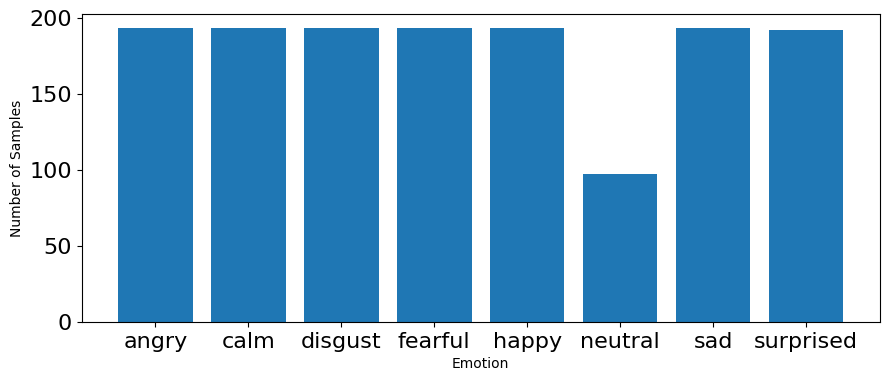

In [7]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(emotions, return_counts=True)
plt.bar(x=range(8), height=count)
plt.xticks(ticks=range(8), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

Processed 1447/1440 audio samples 

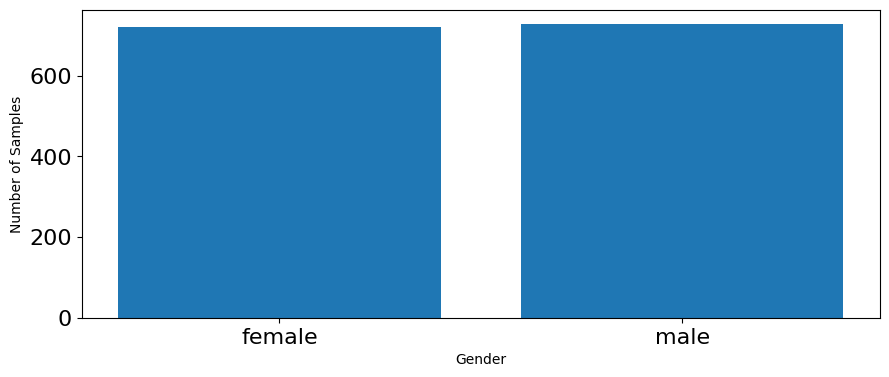

In [9]:
def load_data():
    X, y = [], []
    count = 0
    for file in glob.glob("/content/drive/MyDrive/IAT360/Audios/AudioData/Actor_*/*.wav"):
        file_name = os.path.basename(file)
        gender = int(file_name.split("-")[4])

        if gender % 2 == 0:
            gender = 'female'
        else:
            gender = 'male'

        y.append(gender)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f'Processed {count}/{1440} audio samples', end=' ')
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)

# Load data
features, gender = load_data()

# Plot gender distribution
plt.figure(figsize=(35, 4))
plt.subplot(1, 3, 1)

# Get unique genders and their counts
gender_list, count = np.unique(gender, return_counts=True)

# Plot the bar graph
plt.bar(x=range(len(gender_list)), height=count)

# Set x-ticks and labels dynamically based on the unique number of genders
plt.xticks(ticks=range(len(gender_list)), labels=gender_list, fontsize=10)

plt.xlabel('Gender')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()